In [120]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

from matplotlib import pyplot as plt
import seaborn as sns

# <p style="background-color:#9900cc;padding:15px;font-family:newtimeroman;color:#ffff80;font-size:110%;border-radius:40px 5px;"> 1 | Basic stuff</p>


Age: The age of the students ranges from 15 to 18 years. <br>
Gender: Gender of the students, where 0 represents Male and 1 represents Female.<br>
Ethnicity: The ethnicity of the students, coded as follows:<br>
- 0: Caucasian<br>
- 1: African American<br>
- 2: Asian<br>
- 3: Other
ParentalEducation: The education level of the parents, coded as follows:<br>
- 0: None
- 1: High School
- 2: Some College
- 3: Bachelor's
- 4: Higher
Study Habits<br>
StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.<br>
Absences: Number of absences during the school year, ranging from 0 to 30.<br>
Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.<br>
Parental Involvement<br>
ParentalSupport: The level of parental support, coded as follows:<br>
- 0: None
- 1: Low
- 2: Moderate
- 3: High
- 4: Very High
Extracurricular Activities

Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.<br>

Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.<br>

Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.<br>

Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.<br>

Academic Performance<br>
GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.<br>

Target Variable: Grade Class<br>

GradeClass: Classification of students' grades based on GPA:<br>

- 0: 'A' (GPA >= 3.5)
- 1: 'B' (3.0 <= GPA < 3.5)
- 2: 'C' (2.5 <= GPA < 3.0)
- 3: 'D' (2.0 <= GPA < 2.5)
- 4: 'F' (GPA < 2.0)

In [121]:
path = "data/Student_performance_data _.csv"
data = pd.read_csv(path)
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [122]:
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [123]:
data.dtypes

StudentID              int64
Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [124]:
# Converting the categorical values to object type.
descrete_cols = ["StudyTimeWeekly", "Absences", "Age"]
caterogical_cols = [col for col in data.columns if col not in descrete_cols]

data[caterogical_cols] = data[caterogical_cols].astype("object")
data.describe()

,Age,StudyTimeWeekly,Absences
count,2392.000000,2392.000000,2392.000000
mean,16.468645,9.771992,14.541388
std,1.123798,5.652774,8.467417
min,15.000000,0.001057,0.000000
25%,15.000000,5.043079,7.000000
50%,16.000000,9.705363,15.000000
75%,17.000000,14.408410,22.000000
max,18.000000,19.978094,29.000000


In [125]:
# Remove the student ID col.
data.drop("StudentID", axis=1, inplace=True)
caterogical_cols.remove("StudentID")

In [126]:
# Check for the null values.
data.isnull().sum()


Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [127]:
data["StudyTimeWeekly"] = data["StudyTimeWeekly"].astype("int64")

In [128]:
caterogical_cols

['Gender',
 'Ethnicity',
 'ParentalEducation',
 'Tutoring',
 'ParentalSupport',
 'Extracurricular',
 'Sports',
 'Music',
 'Volunteering',
 'GPA',
 'GradeClass']

In [129]:
# Change the category numbers to the category names ,
col_value_map = {"Gender" : {0: "male", 1: "female"},
                "Ethnicity": {0: "Caucasian", 1: "African American", 2: "Asian", 3: "Others"},
                "ParentalEducation":  {0: "Caucasian", 1: "High School", 2: "Some College", 3: "Bachelor's", 4: "Higher"},
                "Tutoring":  {0: "no", 1: "yes"},
                "ParentalSupport" : {0: "None", 1: "Low", 2: "Moderate", 3: "High", 4: "Very High", 5: ""},
                "Extracurricular": {0: "no", 1: "yes"},
                "Sports": {0: "no", 1: "yes"},
                "Music": {0: "no", 1: "yes"},
                "Volunteering": {0: "no", 1: "yes"},
                "GradeClass": {0: "A", 1: "B", 2: "C", 3: "D", 4: "F"},
                }

for col in caterogical_cols:
    if col =="GPA":
        continue
    data[col] = data[col].map(col_value_map[col])

data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,female,Caucasian,Some College,19,7,yes,Moderate,no,no,yes,no,2.929196,C
1,18,male,Caucasian,High School,15,0,no,Low,no,no,no,no,3.042915,B
2,15,male,Asian,Bachelor's,4,26,no,Moderate,no,no,no,no,0.112602,F
3,17,female,Caucasian,Bachelor's,10,14,no,High,yes,no,no,no,2.054218,D
4,17,female,Caucasian,Some College,4,17,yes,High,no,no,no,no,1.288061,F


In [130]:
print("Total number of columns: {}".format(len(data.columns)))

print("Total number of rows: {}".format(len(data)))

print("--"*50)
# find the categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
continuous_columns = data.select_dtypes(include=["float64", "int64"]).columns
print("categorical Columns: {}".format(len(categorical_columns)))
print(categorical_columns)
print("continuous Columns: {}".format(len(continuous_columns)))
print(continuous_columns)

Total number of columns: 14
Total number of rows: 2392
----------------------------------------------------------------------------------------------------
categorical Columns: 11
Index(['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
       'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering',
       'GPA', 'GradeClass'],
      dtype='object')
continuous Columns: 3
Index(['Age', 'StudyTimeWeekly', 'Absences'], dtype='object')


# <p style="background-color:#9900cc;padding:15px;font-family:newtimeroman;color:#ffff80;font-size:110%;border-radius:40px 5px;"> 2 | EDA </p>


There are a lot of Qualitative variables, so Bie, Bar, 

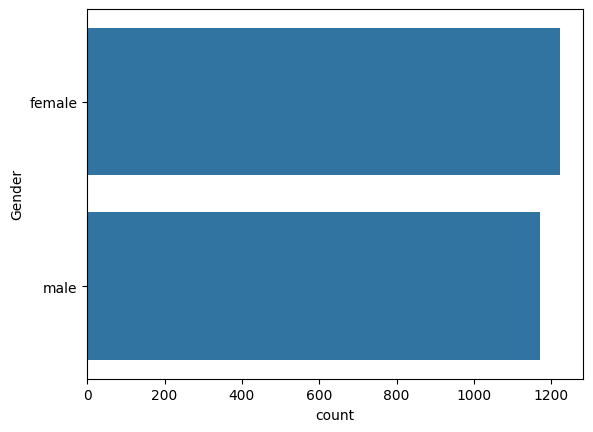

In [131]:
# The gender decomposistion in plotly.
# Sample data
# Create the count plot
sns.countplot(y="Gender", data=data)
plt.show()


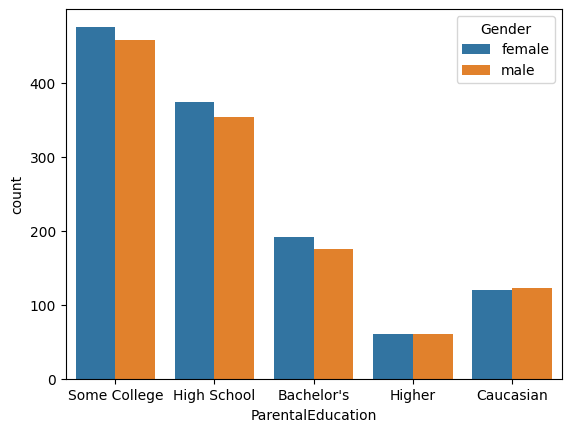

In [132]:
# Comparing gender and parential status of parents. -- Stacked bar chat
sns.countplot(x="ParentalEducation", hue="Gender", data=data)
plt.show()

In [133]:
# 2 | Comparing gender and parential status of parents. -- Stacked bar chat
import plotly.express as px
count = data["Gender"].value_counts().values
px.bar(data_frame=data, y="Gender", color="ParentalEducation")

In [134]:
gender_male = data[data["Gender"] == 0]
gender_female = data[data["Gender"] == 1]

gender_female["ParentalEducation"].value_counts()


Series([], Name: count, dtype: int64)

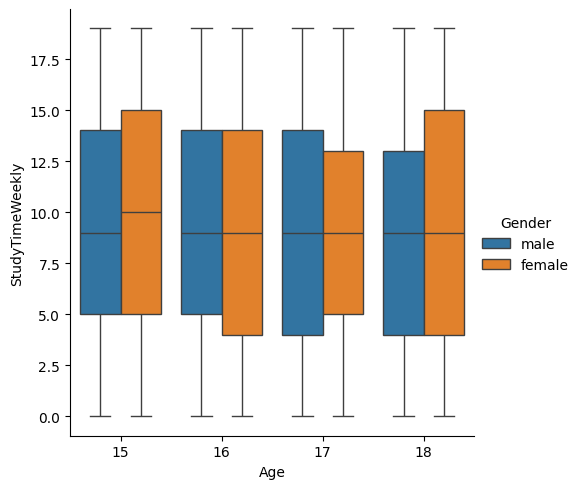

In [135]:
# The relationship between Age study hour and gender
sns.catplot(data=data, x="Age", y="StudyTimeWeekly", hue="Gender",
            kind="box")


# Observations:
- In 16,17,18  age students the average time of study for girls and boys are same.
- boys and girls study almost the same amount of time.
- no one studies more than 18 hrs per week -- which is around 2.5 hrs per day. No one studies more than 2.5 hrs per day.

In [136]:
# 4 | Pir chart for ethenicity.
fig = go.Figure()

fig.add_trace(
    go.Pie(
        labels=data["Ethnicity"].value_counts().index,
        values=data["Ethnicity"].value_counts().values,
        hole=.1,
        name="Ethnicity"
    )
)

fig.update_layout(
    template="plotly_dark",
    title="The number of Students from each ethenicity.",
)

<Axes: xlabel='Age', ylabel='count'>

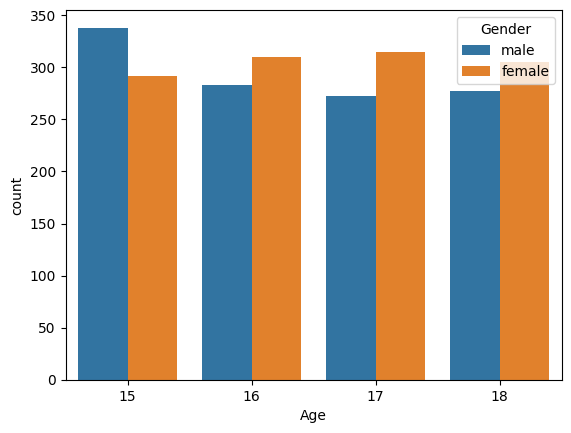

In [137]:
# 4 | Pir chart for ethenicity.
sns.countplot(data=data, x = "Age", hue="Gender")

<Axes: xlabel='ParentalEducation', ylabel='count'>

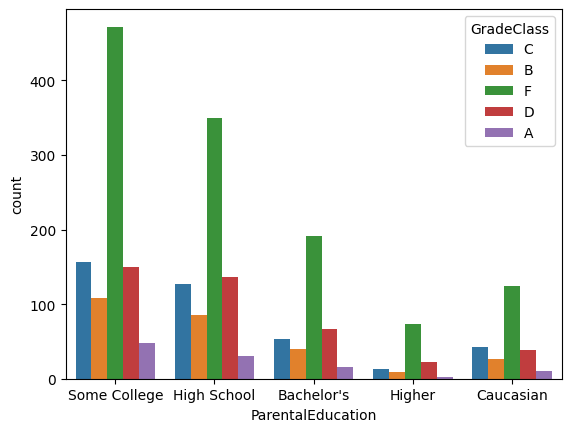

In [138]:
# 6 | Paretnece education level and grade relationship.
sns.countplot(x="ParentalEducation", hue="GradeClass", data=data)

# Observation:
- 1. The distribution of grades are equal across the parential education.

<Axes: xlabel='ParentalSupport', ylabel='count'>

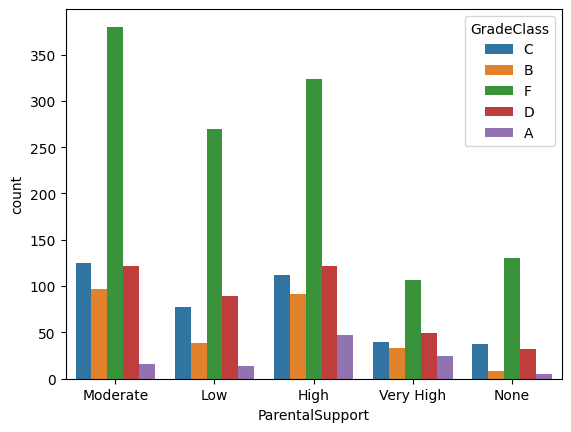

In [139]:
# 7 | Does parent support affect the gades of the student?  - No
sns.countplot(x="ParentalSupport", hue="GradeClass", data=data)

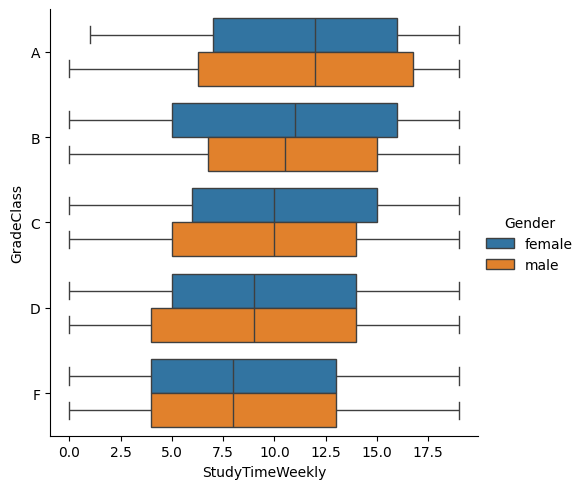

In [140]:
# 8 | Dose the Grade A student study more ?
sns.catplot(x="StudyTimeWeekly", y="GradeClass", hue="Gender", data=data, kind="box", order=["A", "B", "C", "D", "F"])

# Observation: I always have this doubt does the student have more marks getting more marks just because he study more time or something else.
- 1. As per this data sample actually the Grade A student study more than other grade students. 
- 2. In Grade A, its take less time for girls to get that grade combared to boys.


<Axes: xlabel='Sports', ylabel='count'>

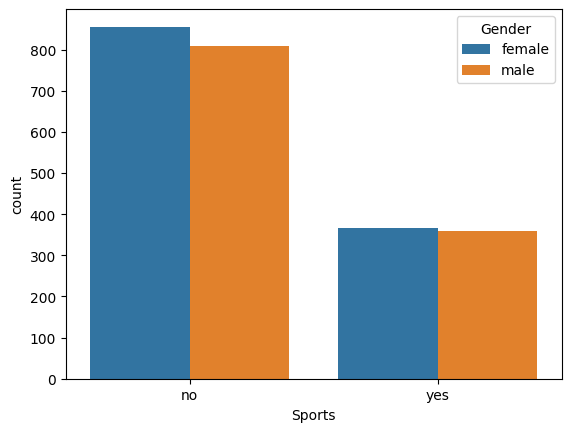

In [ ]:
# 8 | Does participating in the sports affect the GPA?
sns.countplot(x="Sports", hue="Gender", data=data)

# Observation
There are equal number of boys and girls in the sports.

<Axes: xlabel='Sports', ylabel='count'>

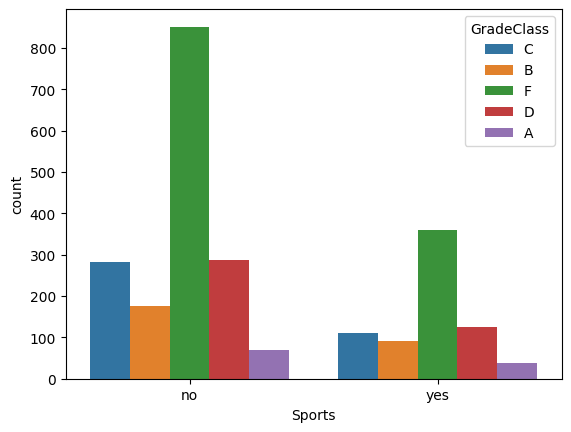

In [ ]:

sns.countplot(x="Sports", hue="GradeClass", data=data)

# Observation:
Cant really say anything from this because the count between sports yes and no is not same and the grade distribution is seems not accected by the sports participation.


<Axes: xlabel='ParentalSupport', ylabel='count'>

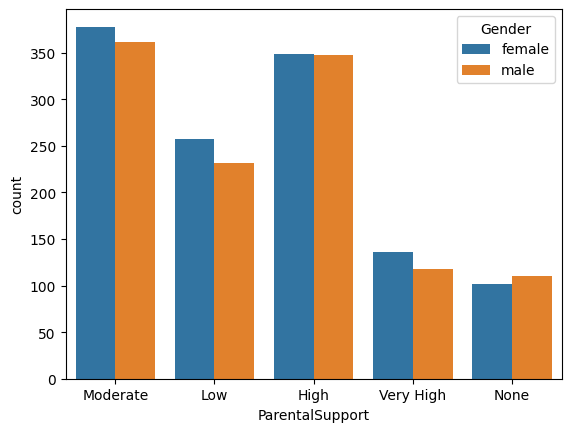

In [ ]:
# 9 | Dose the parent support changes according to gender ? - NO
sns.countplot(x="ParentalSupport", hue="Gender", data=data)

# <p style="background-color:#9900cc;padding:15px;font-family:newtimeroman;color:#ffff80;font-size:110%;border-radius:40px 5px;"> 3 | Hypothesis testing </p>


In [ ]:
import statsmodels.api as sm
from scipy import stats


# 1 | T-test to check the mean of the study hours per week.
**Problem statement:**
The mean study hours per week is 9.5 hours.

- Since we dont know the population standard deviation, we are going for the one sample t-test. 

**Assumption of T-test:**
- The population is normally distributed. (We can check the normality by the Q-Q plot.)
- The samples are independent.
- Equal variance across the groups.



**Null Hypothesis:** The mean equal to 10 hours.

**Alternate Hypothesis:** The mean is not equal to 10 hours.

**Significance level:** 5%



/tmp/ipykernel_26579/209841114.py:4: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



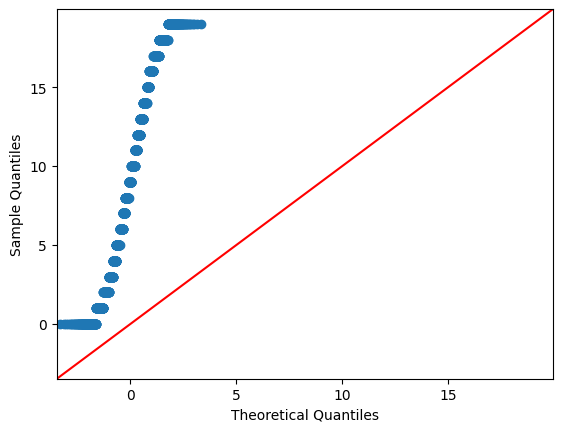

In [151]:

fig = sm.qqplot(data["StudyTimeWeekly"], line ='45')
fig.show()

- This is clearly not following the normal distribution, but since we know the test should not reject the null hypothesis, we will give it a try.


In [159]:

# The null hypothesis mean we wanna check to.
mu = 9.5

# Perform one-sample t-test.
t_stat, p_value = stats.ttest_1samp(data["StudyTimeWeekly"], mu)
print("T statistic:", t_stat)
print("P-value:", p_value)

T statistic: -1.944053420755869
P-value: 0.052006165883851006


`p-value` is 0.052 -- this is equal to the significance level. So we should not be able to reject the null hypothesis based on this sample. 


# 2 | 2 sample T-test to check the mean of the study hours per week.
**Problem statement:**
The mean study hours per week of boys is equal to the mean study hours per week of girls.

- Since we dont know the population standard deviation, we are going for the two sample t-test. 

**Assumption of T-test:**
- The population is normally distributed. (We can check the normality by the Q-Q plot.)
- The samples are independent.
- Equal variance across the groups.



**Null Hypothesis:** The mean study hours per week of boys is equal to the mean study hours per week of girls.

**Alternate Hypothesis:** The mean study hours per week of boys is not equal to the mean study hours per week of girls.

**Significance level:** 5%



In [165]:
data[data["Gender"] == "male"]["StudyTimeWeekly"]

1       15
2        4
5        8
6       15
8        4
        ..
2377    12
2381    10
2382    13
2386    13
2388     7
Name: StudyTimeWeekly, Length: 1170, dtype: int64

In [167]:
a = data[data["Gender"] == "male"]["StudyTimeWeekly"]
b = data[data["Gender"] == "female"]["StudyTimeWeekly"]
calculated_test_statistics, p_value = stats.ttest_ind(a = a, b = b)

print("Calculated test statistics:", calculated_test_statistics)
print("p-value:", p_value)

Calculated test statistics: -0.5165525757619979
p-value: 0.6055163192306484


`p-value` is 0.606 , which is very large than the significance level... so reject the null hypothesis.

`Conclutions is`: The mean study hours per week of boys is not equal to the mean study hours per week of girls. yes it is as we saw in the plots.

# 3 | Chi Squard test of independence
**Problem statement:**
I wanna test, is there any relationship between the Parents support and student grades 

- Since we wanna test the 2 categorical variables are related or not (independent of each other or not), we are opted to test by the Chi-Squard test of independent.

**Assumption of T-test:**




**Null Hypothesis:** The mean study hours per week of boys is equal to the mean study hours per week of girls.

**Alternate Hypothesis:** The mean study hours per week of boys is not equal to the mean study hours per week of girls.

**Significance level:** 5%

